In [1]:
#Assignment no. 2 - Assignment on data pre-processing.


In [3]:
import pandas as pd
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
data=pd.read_csv('loan_data_set.csv')

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
data.drop('Loan_ID',axis=1,inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [9]:
data['Gender']=data['Gender'].apply(lambda x: 0 if x=='Male' else 1)
data['Married']=data['Married'].apply(lambda x: 0 if x=='No' else 1)
#data['Dependents'].apply(lambda x: 0 if x=='Male' else 1)
data['Education']=data['Education'].apply(lambda x: 0 if x=='Not Graduate' else 1)
data['Self_Employed']=data['Self_Employed'].apply(lambda x: 0 if x=='No' else 1)
data['Loan_Status']=data['Loan_Status'].apply(lambda x: 0 if x=='N' else 1)

def parea(x):
    if x=='Urban':
        return 0
    elif x=='Rural':
        return 1
    else:
        return 2
data['Property_Area']=data['Property_Area'].map({'Urban':0,'Rural':1,'Semiurban':2})

In [10]:
data.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0.0,NaN,360.0,1.0,0,1
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,0,1
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0,1
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,0,1
5,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,0,1
6,0,1,0,0,0,2333,1516.0,95.0,360.0,1.0,0,1
7,0,1,3+,1,0,3036,2504.0,158.0,360.0,0.0,2,0
8,0,1,2,1,0,4006,1526.0,168.0,360.0,1.0,0,1
9,0,1,1,1,0,12841,10968.0,349.0,360.0,1.0,2,0


<AxesSubplot:>

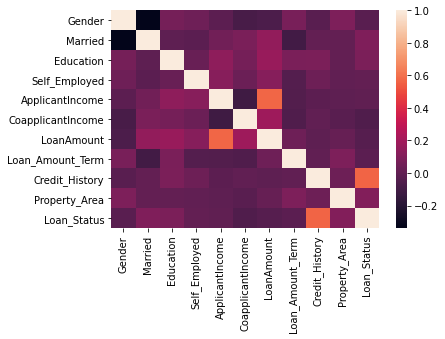

In [11]:
import seaborn as sns
%matplotlib inline
sns.heatmap(data.corr())

In [12]:
data.corr()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,-0.336818,0.061497,0.039440,-0.013933,-0.082316,-0.065501,0.071026,-0.026349,0.089970,-0.025407
Married,-0.336818,1.000000,-0.012304,-0.021584,0.051708,0.075948,0.149743,-0.102049,0.006082,0.003071,0.091478
Education,0.061497,-0.012304,1.000000,0.019059,0.140760,0.062290,0.171133,0.078784,0.081822,0.003592,0.085884
Self_Employed,0.039440,-0.021584,0.019059,1.000000,0.121356,0.028834,0.114148,-0.040768,0.037267,0.001218,0.005857
ApplicantIncome,-0.013933,0.051708,0.140760,0.121356,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.007894,-0.004710
CoapplicantIncome,-0.082316,0.075948,0.062290,0.028834,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.028356,-0.059187
LoanAmount,-0.065501,0.149743,0.171133,0.114148,0.570909,0.188619,1.000000,0.039447,-0.008433,0.014074,-0.037318
Loan_Amount_Term,0.071026,-0.102049,0.078784,-0.040768,-0.045306,-0.059878,0.039447,1.000000,0.001470,0.090610,-0.021268
Credit_History,-0.026349,0.006082,0.081822,0.037267,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.037822,0.561678
Property_Area,0.089970,0.003071,0.003592,0.001218,-0.007894,-0.028356,0.014074,0.090610,0.037822,1.000000,0.103253


In [13]:
data=data[['Married','Education','Credit_History','Property_Area','Loan_Status']]
#data

In [14]:
import seaborn as sns
coded_data=pd.get_dummies(data,columns=['Married','Education','Credit_History','Property_Area'],drop_first=True)

In [15]:
coded_data

,Loan_Status,Married_1,Education_1,Credit_History_1.0,Property_Area_1,Property_Area_2
0,1,0,1,1,0,0
1,0,1,1,1,1,0
2,1,1,1,1,0,0
3,1,1,0,1,0,0
4,1,0,1,1,0,0
...,...,...,...,...,...,...
609,1,0,1,1,1,0
610,1,1,1,1,1,0
611,1,1,1,1,0,0
612,1,1,1,1,0,0


In [16]:
# TRAIN, TEST SPLIT
from sklearn.model_selection import train_test_split

X=coded_data.drop(['Loan_Status'],axis=1)
y=coded_data['Loan_Status']


In [17]:
#Conlusion - we successfully perform Data Pre-processing